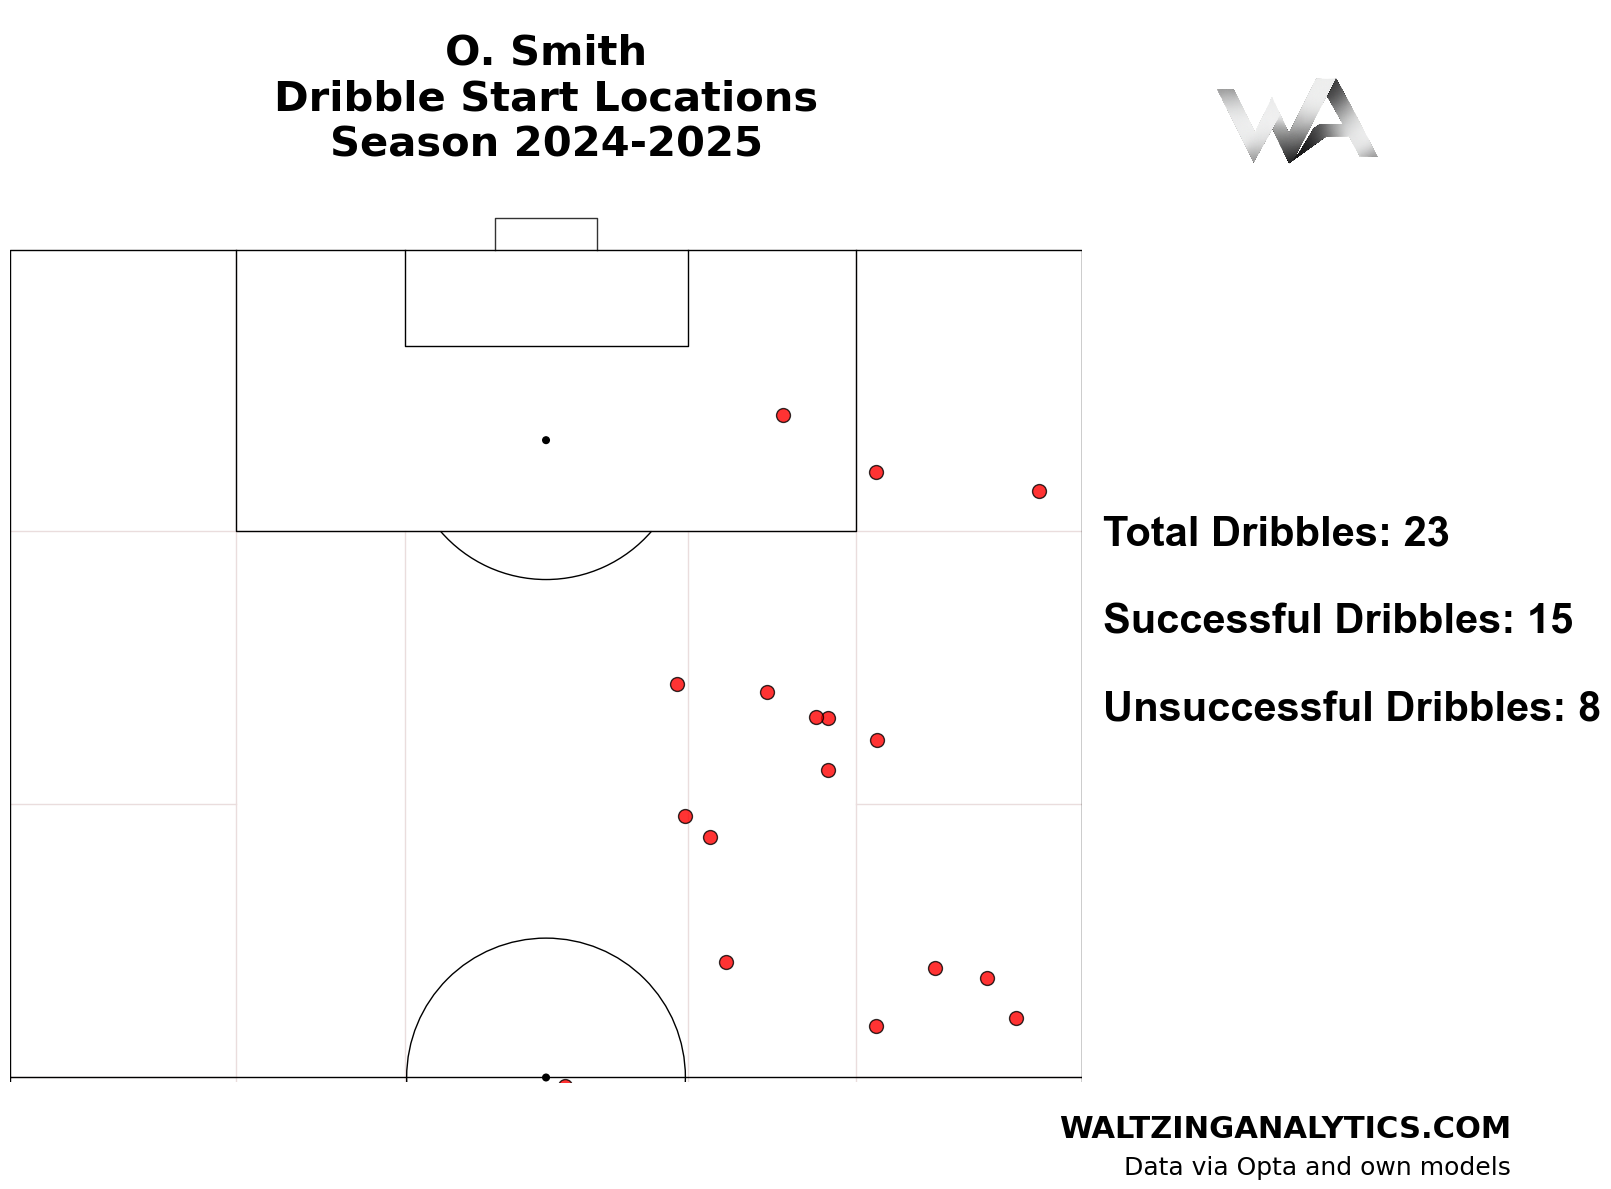

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import VerticalPitch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# === Load data ===
df = pd.read_excel("O_Smith_Dribbles_All_Matches.xlsx")

# === Clean data ===
df.dropna(subset=['x', 'y'], inplace=True)
df = df[df['y'] >= 50]  # Optional: focus on attacking half

# === Set up pitch ===
pitch = VerticalPitch(positional=True, pitch_type='opta', pitch_color='white', line_color='black',
                      linewidth=1, half=True, goal_type='box', goal_alpha=0.8)
fig, ax = pitch.draw(figsize=(18, 12))
ax.set_ylim(49.7, 105)
ax.set_xlim(0, 100)  # Flip x-axis

# === Plot scatter ===
pitch.scatter(df['x'], df['y'], ax=ax, s=100, color='red', edgecolors='black', alpha=0.8, zorder=3)

# === Stats box ===
total_dribbles = len(df)
successful = df[df['outcome'] == 1].shape[0]
unsuccessful = df[df['outcome'] == 0].shape[0]

stats_text = (
    f"Total Dribbles: {total_dribbles}\n\n"
    f"Successful Dribbles: {successful}\n\n"
    f"Unsuccessful Dribbles: {unsuccessful}\n"
)

ax.text(1.02, 0.48, stats_text, transform=ax.transAxes, fontsize=30,
        verticalalignment='center', fontweight='bold', color='black', fontfamily="Arial", linespacing=1.2)

# === Logo ===
logo = plt.imread("/Users/user/Downloads/wa2.png")  # Adjust as needed
imagebox = OffsetImage(logo, zoom=0.15)
ab = AnnotationBbox(imagebox, (1.2, 1.05), frameon=False, xycoords='figure fraction', boxcoords="axes fraction")
ax.add_artist(ab)

# === Title + branding ===
fig.set_facecolor('white')
ax.set_title("O. Smith\nDribble Start Locations\nSeason 2024-2025", fontsize=30,
             color="black", fontweight='bold', pad=8)
ax.text(1.4, -0.06, "WALTZINGANALYTICS.COM", transform=ax.transAxes, fontsize=22,
        fontweight='bold', color='black', ha='right')
ax.text(1.4, -0.10, "Data via Opta and own models", transform=ax.transAxes, fontsize=18,
        color='black', ha='right')

# === Save and show ===
plt.savefig('O_Smith_Dribble_Scatter_Plot.png', dpi=500, bbox_inches='tight', facecolor='white')
plt.show()


In [24]:
pip install --upgrade mplsoccer


  Attempting uninstall: mplsoccer
    Found existing installation: mplsoccer 1.4.0
    Uninstalling mplsoccer-1.4.0:
      Successfully uninstalled mplsoccer-1.4.0
Note: you may need to restart the kernel to use updated packages.


In [33]:
import os
import pandas as pd

# === Settings ===
input_folder = "/Users/user/Event-data/Women/WSL 2025"  # Change this to your folder
output_file = "Liverpool_Matches_With_Qualifiers.xlsx"

# === Function to extract qualifiers from flattened columns ===
def add_qualifiers(df):
    qualifier_id_cols = [col for col in df.columns if col.endswith('/qualifierId')]

    df['endX'] = None
    df['endY'] = None
    df['Assist'] = 0

    for idx, row in df.iterrows():
        for id_col in qualifier_id_cols:
            base = id_col.rsplit('/', 1)[0]
            val_col = f"{base}/value"

            if pd.isna(row.get(id_col)):
                continue

            try:
                qualifier_id = int(row[id_col])
            except (ValueError, TypeError):
                continue

            if qualifier_id == 140:
                df.loc[idx, 'endX'] = row.get(val_col)
            elif qualifier_id == 141:
                df.loc[idx, 'endY'] = row.get(val_col)
            elif qualifier_id == 210:
                df.loc[idx, 'Assist'] = 1
    return df

# === Collect all matching files ===
all_data = []

for filename in os.listdir(input_folder):
    if filename.endswith(".csv") and "Liverpool" in filename:
        filepath = os.path.join(input_folder, filename)

        try:
            df = pd.read_csv(filepath)
            df.columns = df.columns.str.strip()  # Clean column names
            df = add_qualifiers(df)
            df['source_file'] = filename
            all_data.append(df)
            print(f"✅ Processed: {filename} ({len(df)} rows)")
        except Exception as e:
            print(f"❌ Error processing {filename}: {e}")

# === Combine and export ===
if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df.to_excel(output_file, index=False)
    print(f"\n✅ Saved combined file: {output_file} ({len(final_df)} total rows)")
else:
    print("\n⚠️ No Liverpool-related CSV files found or processed.")


✅ Processed: Liverpool 2-2 Spurs.csv (1553 rows)
✅ Processed: Liverpool 2-1 Brighton.csv (1787 rows)
✅ Processed: Aston Villa 1-2 Liverpool.csv (1736 rows)
✅ Processed: Everton 1-0 Liverpool.csv (1939 rows)
✅ Processed: Spurs 2-3 Liverpool.csv (1545 rows)
✅ Processed: Man City 4-0 Liverpool.csv (1737 rows)
✅ Processed: Liverpool 1-1 Leicester.csv (1813 rows)
✅ Processed: Man Utd 4-0 Liverpool.csv (1635 rows)
✅ Processed: West Ham 1-1 Liverpool.csv (1638 rows)
✅ Processed: Chelsea 1-0 Liverpool.csv (1698 rows)
✅ Processed: Liverpool 0-1 Arsenal.csv (1706 rows)
✅ Processed: Leicester 2-1 Liverpool.csv (1660 rows)
✅ Processed: Liverpool 1-2 Aston Villa.csv (1759 rows)
✅ Processed: Liverpool 1-1 Crystal Palace.csv (1679 rows)
✅ Processed: Brighton 1-2 Liverpool.csv (1777 rows)
✅ Processed: Liverpool 0-3 Chelsea.csv (1734 rows)
✅ Processed: Arsenal 4-0 Liverpool.csv (1746 rows)
✅ Processed: Crystal Palace 0-1 Liverpool.csv (1746 rows)
✅ Processed: Liverpool 1-0 West Ham.csv (1774 rows)
✅ Pr

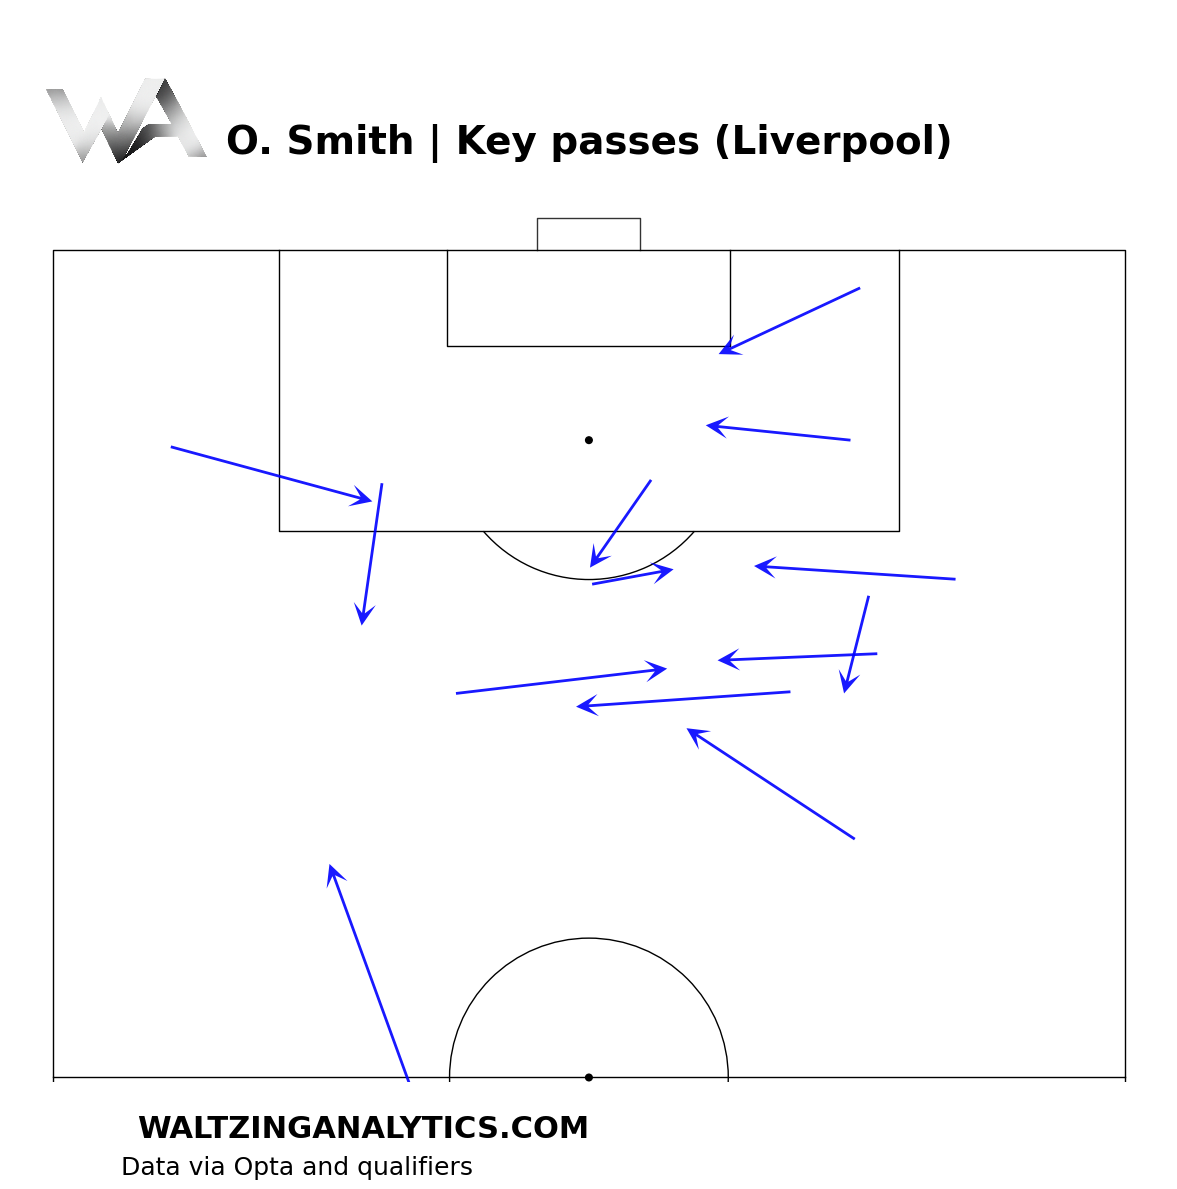

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# === Load processed file ===
df = pd.read_excel("Liverpool_Matches_With_Qualifiers.xlsx")

# === Filter for assists by O. Smith ===
df_assists = df[
    (df['typeId'] == 1) &
    (df['Assist'] == 1) &
    (df['playerName'] == 'O. Smith')
].copy()

# Convert coordinates to numeric and drop rows with missing locations
for col in ['x', 'y', 'endX', 'endY']:
    df_assists[col] = pd.to_numeric(df_assists[col], errors='coerce')
df_assists.dropna(subset=['x', 'y', 'endX', 'endY'], inplace=True)

# === Set up the pitch ===
pitch = VerticalPitch(pitch_type='opta', half=True, pitch_color='white', line_color='black',
                      linewidth=1, goal_type='box', goal_alpha=0.8)
fig, ax = pitch.draw(figsize=(18, 12))
ax.set_ylim(49.7, 105)

# === Plot assist arrows ===
pitch.arrows(df_assists['x'], df_assists['y'], df_assists['endX'], df_assists['endY'],
             ax=ax, width=2, headwidth=8, headlength=8, color='blue', alpha=0.9, zorder=2)

# === Title & branding ===
fig.set_facecolor('white')
ax.set_title("O. Smith | Key passes (Liverpool)", fontsize=28,
             color="black", fontweight='bold', pad=10)

# Optional logo
logo_path = "/Users/user/Downloads/wa2.png"  # Adjust path if needed
try:
    logo = plt.imread(logo_path)
    imagebox = OffsetImage(logo, zoom=0.15)
    ab = AnnotationBbox(imagebox, (0.1, 1.05), frameon=False, xycoords='figure fraction', boxcoords="axes fraction")
    ax.add_artist(ab)
except Exception:
    print("⚠️ Logo not found or could not be loaded.")

# Branding text
ax.text(0.5, -0.06, "WALTZINGANALYTICS.COM", transform=ax.transAxes,
        fontsize=22, fontweight='bold', color='black', ha='right')
ax.text(0.4, -0.10, "Data via Opta and qualifiers", transform=ax.transAxes,
        fontsize=18, color='black', ha='right')

# === Save and show ===
plt.savefig("O_Smith_Assist_Arrows_Liverpool.png", dpi=500, bbox_inches='tight', facecolor='white')
plt.show()
